In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
countries_A = pd.read_csv(r'../23-Final-Project/countries_assistance.csv')
countries_A.head()

,Unnamed: 0,Country,Mean Assistance (2011-2016),Mean CO2 (2011-2016),Mean Employment (2011-2016),Mean GDP (2011-2016)
0,0,Afghanistan,5.308612e+09,9703.49500,16.351667,1961.268333
1,1,Albania,2.976650e+08,4953.50500,18.136667,11050.331670
2,2,Algeria,1.533983e+08,139031.86170,30.910000,12750.568330
3,3,Angola,2.573450e+08,35430.55667,7.741667,7404.383333
4,4,Antigua and Barbuda,3.886667e+06,532.32500,0.000000,19435.211670


In [5]:
countries_as= countries_A.drop(columns=["Country"])
countries_as.head()

,Unnamed: 0,Mean Assistance (2011-2016),Mean CO2 (2011-2016),Mean Employment (2011-2016),Mean GDP (2011-2016)
0,0,5.308612e+09,9703.49500,16.351667,1961.268333
1,1,2.976650e+08,4953.50500,18.136667,11050.331670
2,2,1.533983e+08,139031.86170,30.910000,12750.568330
3,3,2.573450e+08,35430.55667,7.741667,7404.383333
4,4,3.886667e+06,532.32500,0.000000,19435.211670


In [6]:
countries_as1=countries_as.rename(columns={"Unnamed: 0": "ID"})
countries_as1

,ID,Mean Assistance (2011-2016),Mean CO2 (2011-2016),Mean Employment (2011-2016),Mean GDP (2011-2016)
0,0,5.308612e+09,9703.495000,16.351667,1961.268333
1,1,2.976650e+08,4953.505000,18.136667,11050.331670
2,2,1.533983e+08,139031.861700,30.910000,12750.568330
3,3,2.573450e+08,35430.556670,7.741667,7404.383333
4,4,3.886667e+06,532.325000,0.000000,19435.211670
...,...,...,...,...,...
132,194,3.636665e+09,165060.838300,22.100000,5557.580000
133,195,2.300815e+09,2661.020000,27.946667,5482.028333
134,196,1.245327e+09,18875.270000,14.271666,3595.601667
135,197,9.828650e+08,4122.318333,10.260000,3449.990000


In [9]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = countries_as1['Mean Assistance (2011-2016)'].values.reshape(-1, 1)
y = countries_as1['Mean CO2 (2011-2016)'].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (137, 1) (137, 1)


array([[5.30861174e+09],
       [2.97665006e+08],
       [1.53398334e+08],
       [2.57345001e+08],
       [3.88666667e+06],
       [5.70133328e+07],
       [3.11374995e+08],
       [1.44913334e+08],
       [2.29558834e+09],
       [8.87816680e+07],
       [3.32100000e+07],
       [5.62900004e+08],
       [1.16103332e+08],
       [6.78728322e+08],
       [5.24620016e+08],
       [9.24033343e+07],
       [9.79488342e+08],
       [1.05510164e+09],
       [5.46640004e+08],
       [2.07008333e+08],
       [7.53003337e+08],
       [7.06343333e+08],
       [3.84016670e+08],
       [5.02488332e+08],
       [1.41365000e+08],
       [1.05365335e+09],
       [7.21116664e+07],
       [3.00967167e+09],
       [1.39065001e+08],
       [6.05666669e+07],
       [1.30200333e+09],
       [1.60660001e+08],
       [1.77950002e+07],
       [2.12086665e+08],
       [2.01133336e+08],
       [2.70819168e+09],
       [1.67196669e+08],
       [9.75999983e+06],
       [9.92700005e+07],
       [1.09690000e+08],


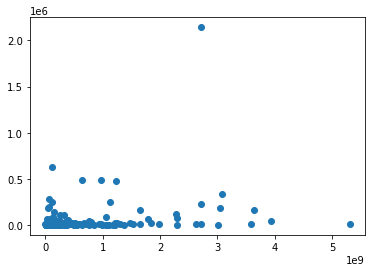

In [10]:
# Plot the data


plt.scatter(X, y)

In [11]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [12]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

model.fit(X, y)

LinearRegression()

In [13]:
# Print the coefficient and the intercept for the model

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[4.98515194e-05]]
y-axis intercept:  [24027.95066497]


In [14]:
#Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1850001.17]]
Max X Value: [[5.30861174e+09]]


In [15]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)


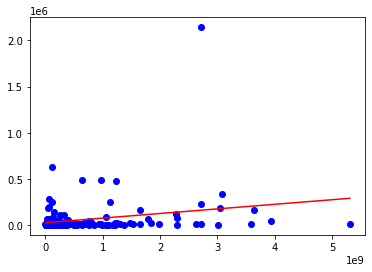

In [16]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [19]:
#to calculate MSE and R2


#from sklearn.metrics import mean_squared_error



In [20]:
X = countries_as1.iloc[:, :2].values
y = countries_as1.iloc[:, 3].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = regressor.predict(X_test)
countries_as2 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
countries_as2

,Real Values,Predicted Values
0,7.913333,15.740239
1,26.791667,16.009586
2,18.800000,16.012800
3,25.240000,15.381602
4,9.101667,15.036193
5,30.236667,15.465518
6,0.000000,15.271104
7,7.600000,15.954672
8,8.788333,15.851707
9,18.018333,16.176762
